## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [5]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [6]:
train, test = keras.datasets.cifar10.load_data()

In [7]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [8]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [9]:
from keras.regularizers import l1, l2, l1_l2
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_ratio=1e-4):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l1(l1_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1(l1_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [10]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L1_EXP = [1e-2, 1e-4, 1e-8, 1e-12]

In [11]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for regulizer_ratio in L1_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], l1_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-l1-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with Regulizer = 0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [====

50000/50000 [==============================] - 9s 184us/step - loss: 2.4626 - accuracy: 0.0983 - val_loss: 2.4624 - val_accuracy: 0.1000
Epoch 40/50
50000/50000 [==============================] - 9s 184us/step - loss: 2.4626 - accuracy: 0.0965 - val_loss: 2.4624 - val_accuracy: 0.1000
Epoch 41/50
50000/50000 [==============================] - 9s 186us/step - loss: 2.4626 - accuracy: 0.0996 - val_loss: 2.4624 - val_accuracy: 0.1000
Epoch 42/50
50000/50000 [==============================] - 9s 186us/step - loss: 2.4626 - accuracy: 0.0978 - val_loss: 2.4623 - val_accuracy: 0.1000
Epoch 43/50
50000/50000 [==============================] - 9s 184us/step - loss: 2.4626 - accuracy: 0.0981 - val_loss: 2.4623 - val_accuracy: 0.1000
Epoch 44/50
50000/50000 [==============================] - 9s 184us/step - loss: 2.4626 - accuracy: 0.0961 - val_loss: 2.4623 - val_accuracy: 0.1000
Epoch 45/50
50000/50000 [==============================] - 9s 185us/step - loss: 2.4626 - accuracy: 0.0970 - val_loss:

50000/50000 [==============================] - 11s 212us/step - loss: 3.4914 - accuracy: 0.5818 - val_loss: 3.6464 - val_accuracy: 0.5124
Epoch 32/50
50000/50000 [==============================] - 10s 204us/step - loss: 3.4375 - accuracy: 0.5865 - val_loss: 3.6393 - val_accuracy: 0.5060- ETA: 7s - loss: 3.4606 - accu - E - ETA: 3s - loss: 3.4433 - accuracy:  - ETA: 3s - loss: 3.4 - ETA - ETA: 0s - loss: 3.437
Epoch 33/50
50000/50000 [==============================] - 11s 219us/step - loss: 3.3843 - accuracy: 0.5883 - val_loss: 3.5427 - val_accuracy: 0.5221
Epoch 34/50
50000/50000 [==============================] - 10s 208us/step - loss: 3.3303 - accuracy: 0.5942 - val_loss: 3.4783 - val_accuracy: 0.5321
Epoch 35/50
50000/50000 [==============================] - 11s 217us/step - loss: 3.2847 - accuracy: 0.5938 - val_loss: 3.4211 - val_accuracy: 0.5366
Epoch 36/50
50000/50000 [==============================] - 11s 219us/step - loss: 3.2330 - accuracy: 0.5960 - val_loss: 3.3917 - val_accu

50000/50000 [==============================] - 10s 194us/step - loss: 1.4556 - accuracy: 0.4895 - val_loss: 1.4786 - val_accuracy: 0.4810loss: 1.4 - ETA: 
Epoch 11/50
50000/50000 [==============================] - 10s 204us/step - loss: 1.4310 - accuracy: 0.4978 - val_loss: 1.4755 - val_accuracy: 0.4763ETA: 2s - loss: 1.4331 - accuracy - ETA: 2s - loss: 1 - ETA: 1s - loss: 1.4341 - accuracy:  - ETA: 1s - loss: 1.4335 - accuracy - ETA: 0s - loss: 1.433
Epoch 12/50
50000/50000 [==============================] - 10s 195us/step - loss: 1.4090 - accuracy: 0.5050 - val_loss: 1.4463 - val_accuracy: 0.4861- loss: 1.4083 - accu - ETA: 5s - loss: 1.406 - ETA: 4s - loss: 1.4072 - ac - ETA: 3s - loss: 1.4075 - accuracy:  - ETA: 3s - ETA: 0s - loss: 1.4087 - accuracy: 
Epoch 13/50
50000/50000 [==============================] - 11s 216us/step - loss: 1.3880 - accuracy: 0.5124 - val_loss: 1.4278 - val_accuracy: 0.4942c - ETA: 7s - loss: 1.395 - ETA: 6s - loss: 1.3940 - accuracy: 0. - - ETA: 4s - ETA:

50000/50000 [==============================] - 11s 213us/step - loss: 0.9969 - accuracy: 0.6481 - val_loss: 1.3781 - val_accuracy: 0.5217A: 2s - loss: 0.9913 - accu - ETA: 2s - loss: 0.9927 - accuracy - ETA: 1s - loss: 0.993 - ETA: 1s - loss: 0.9934 -  - ETA: 0s - loss: 0.9966 - accuracy: 0.64 - ETA: 0s - loss: 0.9964 - accuracy
Epoch 40/50
50000/50000 [==============================] - 11s 218us/step - loss: 0.9849 - accuracy: 0.6525 - val_loss: 1.3814 - val_accuracy: 0.5293ss: 0.9 - ETA: 2s - ETA: 0s - loss:
Epoch 41/50
50000/50000 [==============================] - 10s 203us/step - loss: 0.9757 - accuracy: 0.6570 - val_loss: 1.3782 - val_accuracy: 0.5257
Epoch 42/50
50000/50000 [==============================] - 10s 208us/step - loss: 0.9603 - accuracy: 0.6610 - val_loss: 1.3995 - val_accuracy: 0.5232- loss: 0.9567 - accuracy: 0.66 - ETA: 8s - loss: - ETA: 7s - loss: 0.9480 - accuracy:  - ETA: 7s - loss: - ETA: 6s - loss: 0.9523 - accu - ETA: 5s -
Epoch 43/50
50000/50000 [==========

50000/50000 [==============================] - 11s 211us/step - loss: 1.3620 - accuracy: 0.5200 - val_loss: 1.4657 - val_accuracy: 0.48493641 - accuracy: 0.51 - ETA: 7s - loss: 1.3617 - ac - ETA: 7s - loss: 1.3640 - accuracy:  - ETA: 7s - loss: 1.3650 - ac - ETA: 6s - loss: 1.3638 - accuracy - ETA: 6s - loss: 1.3602 - accu - ETA: 5s - loss: 1.3591 - accuracy:  - ETA: 5s - loss: 1.359 - ETA: 4s - loss: 1.359
Epoch 15/50
50000/50000 [==============================] - 11s 210us/step - loss: 1.3427 - accuracy: 0.5270 - val_loss: 1.4075 - val_accuracy: 0.5017l
Epoch 16/50
50000/50000 [==============================] - 11s 213us/step - loss: 1.3224 - accuracy: 0.5343 - val_loss: 1.4182 - val_accuracy: 0.4950 ac
Epoch 17/50
50000/50000 [==============================] - 11s 222us/step - loss: 1.3062 - accuracy: 0.5383 - val_loss: 1.4026 - val_accuracy: 0.5068ss: 1.3066  - ETA: 7s - loss: 1.3051 - ac - ETA: 7s - loss: 1.3110 -  - ETA - ETA: 4s - loss: 1.3120 -  - ETA: 3s - loss: 1.3116 - accur

50000/50000 [==============================] - 10s 198us/step - loss: 1.0517 - accuracy: 0.6288 - val_loss: 1.3312 - val_accuracy: 0.53491.0332 - accu - ETA: 6s - loss: 1.0409 - accuracy:  - ETA: 6s - loss: 1 - ETA: 4s - loss: 1.0463 - accura - ETA: 4s - loss: 1.0474 - accuracy: 0. - ETA: 4s - loss: 1.0471 -  - ETA: 3s - loss: 1.0488 -  - ETA: 2s - loss: 1.0501 -  - ETA: 2s - loss: 1.0516 - accuracy - ETA: 1s - loss: 1.0529 - accuracy: 0.62 - ETA: 1s - loss: 1.0532 - accuracy - ETA: 1s -
Epoch 36/50
50000/50000 [==============================] - 10s 197us/step - loss: 1.0391 - accuracy: 0.6331 - val_loss: 1.3363 - val_accuracy: 0.53710119 - accura - ETA: 7s - loss: 1.0226 - accura - ETA: 6s - loss: 1.0206 -  - ETA: 5s - loss: 1.0 - ETA: 5s - loss: 1.0291 - accuracy:  - ETA: 4s - loss: 1.0317 - accu - ETA: 4s - loss: 1.0344 - accu - ETA: 3s - loss: 1.0 - ETA: 2s - loss: 1.0353 - accuracy: 0. - ETA: 2s - loss: 1.0340 - accura - ETA: 2s - loss: 1.0327 - accuracy - ETA: 1s - loss: 1.0336 -

50000/50000 [==============================] - 10s 198us/step - loss: 0.8682 - accuracy: 0.6942 - val_loss: 1.4419 - val_accuracy: 0.5186s - loss: 0.8716 - accura - ETA: 7s - loss: 0.8748 - ac - ETA: 7s - loss: 0.8605 - accuracy:  - ETA: 7s - loss: 0.8636 - accura - ETA: 6s - loss: 0.8603 - accuracy: 0.69 - ETA: 6s - loss: 0.8650 -  - ETA: 5s - loss: 0.8635 - accuracy: 0.69 - ETA: 5s - loss: 0.8630 - ac - ETA: 5s - loss: 0.8594 - ac - ETA: 4s - loss: 0.8 - ETA: 3s - loss: 0.8606  - ETA: 2s - loss: 0 - ETA: 1s - loss: 0.862 - ETA: 1s - loss: 0.8677  - ETA: 0s - loss: 0.8677 - accuracy: 


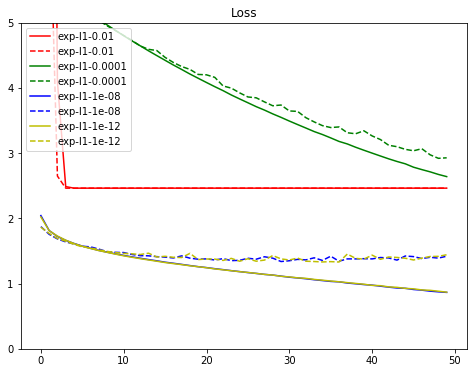

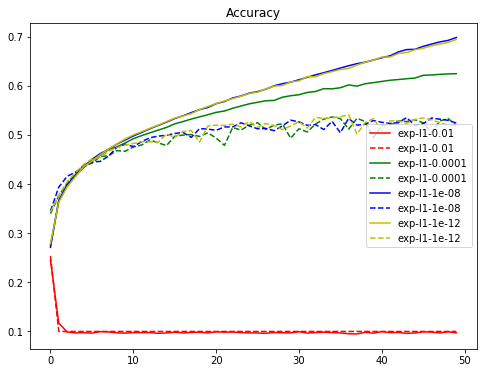

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()